# **Programa para resolver circuitos RLC**
<div>
<img src="clase_RLC/RLC_serie.png">
</div>

<font size="4">Ecuación diferencial de segundo orden para la corriente del circuito:</font>  

<font size="4">$\dfrac{d^2i}{dt^2}+\dfrac{R}{L}\dfrac{di}{dt}+\dfrac{i}{LC}=0$</font>
<hr>
<font size="4">Condiciones iniciales:</font>

<font size="4">$i(0)=I_0\text{ ; }v(0)=V_0 \text{ ; }\dfrac{di(0)}{dt}=-\dfrac{1}{L}(RI_0+V_0)$ </font> 
<hr>
<font size="4">A partir de la ecuación característica obtenemos el tipo de movimiento de la siguiente manera:</font>

<font size="4">$s_{1,2}=-\dfrac{R}{2L}\pm\sqrt{\left(\dfrac{R}{2L}\right)^2-\dfrac{1}{LC}}$</font>
<hr>
<font size="4">Reescribiendo la anterior ecuación se obtiente</font>

<font size="4">$s_{1,2}=-\alpha\pm\sqrt{\alpha^2-\omega_0^2}$</font>  
<font size="4">$\alpha = \dfrac{R}{2L}\text{ ; } \omega_0 = \dfrac{1}{\sqrt{LC}}$</font>

### Ejercicio de aplicación RLC serie
<hr>
<div>
<img src="clase_RLC/RLC_serie_ej1.png">
</div>
<hr>
<font size="5">Enunciado</font>  

<font size="4">$\text{Hallar } i(t) \text{ para el circuito de la figura anterior.}$</font>
<hr>
<font size="5" color="green">Solución</font>  
<hr>
<font size="4">Primero se hallan las condiciones iniciales</font>  

<font size="4">$i(0)= \dfrac{10}{4+6}=1 A \text{ ; } v(0)= 6i(0)= 6 V$</font>

<hr>

<font size="4">Para $t > 0$ se tiene entonces</font>  

In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import sympy as sp
import math

##### Creación variable simbólica #####
t = sp.symbols('t')

#####  Constantes  #####
R = float(9) # [OHM]
C = float(20*10**(-3)) # [F]
L = float(0.5) # [H]

#####  Condiciones Iniciales  #####
Vo = float(-6) # [V]
Io = float(1) # [A]

Xen   = float(0)

#############################################################
##### Se selecciona el tipo de circuito a ser analizado #####
##### True  -> RLC serie                                #####
##### False -> RLC paralelo                             #####  
#############################################################
RLC_serie = True

xo = float(0)
dxo = float(0)
alpha = float(0)
omega = float(1/math.sqrt(L*C))

if RLC_serie == 1 and Xen == 0:
    alpha = float(R/(2*L))
    xo = Io
    dxo = float(-(Vo+R*Io)/L)
    
elif RLC_serie == 1 and Xen > 0:
    alpha = float(R/(2*L))
    xo = Vo
    dxo = float(Io/C)
    
elif RLC_serie == 0 and Xen == 0:
    alpha = float(1/(2*R*C))
    xo = Vo
    dxo = float(-(Vo+R*Io)/(R*C))
    
elif RLC_serie == 0 and Xen > 0:
    alpha = float(1/(2*R*C))
    xo = Io
    dxo = float(Vo/L)

else:
    print("Error!!!!")

<hr>
<font size="5" color="green">1. Se encuentra la solución en términos de $C_1$ y $C_2$</font>  
<hr>

In [2]:
##### Se identifica el tipo de movimiento  #####
def ecuacionMovimiento(alpha,omega,Xen = 0,imprimeRaices=False):
    discr = alpha**2 - omega**2
    y = sympify("0")
    if discr == 0:
        if imprimeRaices:
            print("Movimiento criticamente amortiguado. alpha = %.4f ; omega = %.4f" % (alpha,omega))
            print("Raices s_1,2 = %0.4f"%(-alpha))
            
        y = sp.sympify("Xen + (C1*t+C2)*exp(-alpha*t)")
        y = y.subs("alpha",round(float(alpha) , 3 ))
        y = y.subs("Xen",round(float(Xen) , 3 ))
        
    elif discr > 0:
        
        s1 = -alpha + math.sqrt(discr)
        s2 = -alpha - math.sqrt(discr)
            
        if imprimeRaices:
            print("Movimiento sobreamortiguado. alpha = %.4f ; omega = %.4f" % (alpha,omega))
            print("Raices s_1 = %0.4f ; s2 = %0.4f"%(s1,s2))
        y = sp.sympify("Xen + C1*exp(s1*t)+C2*exp(s2*t)")
        y = y.subs("s1",round(float(s1) , 3 ) )
        y = y.subs("s2",round(float(s2) , 3 ))
        y = y.subs("Xen",round(float(Xen) , 3 ))
        
    else:
        
        s1 = math.sqrt((-1)*discr)
        omega_d = math.sqrt((-1)*discr)
        if imprimeRaices:
            print("Movimiento subamortiguado. alpha = %.4f ; omega = %.4f" % (alpha,omega))
            print("Raices s_1 = -%0.4f+j%0.4f ; s_2 = -%0.4f+j%0.4f"%(alpha,omega_d,alpha,omega_d))
            
        y = sp.sympify("Xen + exp(-alpha*t)*( C1* cos(omega_d*t) + C2* sin(omega_d*t) )")
        y = y.subs("alpha",round(float(alpha) , 3 ))
        y = y.subs("omega_d",round(float(omega_d) , 3 ) )
        y = y.subs("Xen",round(float(Xen) , 3 ))
        
    return y

# Prueba de ejecución
ecuacionMovimiento(alpha,omega,Xen,True)

Movimiento subamortiguado. alpha = 9.0000 ; omega = 10.0000
Raices s_1 = -9.0000+j4.3589 ; s_2 = -9.0000+j4.3589


<hr>
<font size="5" color="green">2. Se deriva la ecuación diferencial</font>  
<hr>

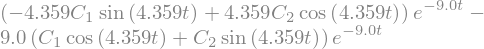

In [3]:
#####  Se realiza la derivada de la solución  #####
def derivada(y_t):
    yp_t = y_t.diff(t)
    return yp_t
# Prueba de ejecución
derivada(ecuacionMovimiento(alpha,omega,Xen))

<hr>
<font size="5" color="green">3. Se encuentra el valor de las constantes</font>  
<hr>

In [4]:
#####  Se sustituyen las condiciones iniciales  #####
def solucionSistema2x2(y,yp,xo,dxo):
    t, C1, C2 = symbols('t C1 C2')
    f1 = y.subs(t,0)
    f2 = yp.subs(t,0)

    Eqns = [sympify(f1 - xo),sympify(f2 - dxo)]
    #####  Se obtiene la solución final  #####
    x = linsolve(Eqns,C1,C2)

    A1 = round(float ( x.args[0][0] ) , 3 )
    A2 = round(float ( x.args[0][1] ) , 3 )
    y = y.subs([(C1,A1),(C2,A2)])
    return y

solucionSistema2x2(ecuacionMovimiento(alpha,omega,Xen),derivada(ecuacionMovimiento(alpha,omega,Xen)),xo,dxo)

## <font color="blue">Graficación de los datos</font>

In [5]:
##### Creación variable simbólica #####
t = sp.symbols('t')

##### Creación de constantes #####
RLC_PARALELO = 0
RLC_SERIE = 1

def variableGraficacion(R=float(0),L=float(0),C=float(0),Vo=float(0),Io=float(0),RLC_serie=int(1),Xen=float(0)):

    xo = float(0)
    dxo = float(0)
    alpha = float(0)
    omega = float(1/math.sqrt(L*C))
    vble_analisis = str('')

    if RLC_serie == 1 and Xen == 0:
        alpha = float(R/(2*L))
        xo = Io
        dxo = float(-(Vo+R*Io)/L)
        vble_analisis = 'i(t)'

    elif RLC_serie == 1 and Xen > 0:
        alpha = float(R/(2*L))
        xo = Vo
        dxo = float(Io/C)
        vble_analisis = 'v(t)'

    elif RLC_serie == 0 and Xen == 0:
        alpha = float(1/(2*R*C))
        xo = Vo
        dxo = float(-(Vo+R*Io)/(R*C))
        vble_analisis = 'v(t)'

    elif RLC_serie == 0 and Xen > 0:
        alpha = float(1/(2*R*C))
        xo = Io
        dxo = float(Vo/L)
        vble_analisis = 'i(t)'

    else:
        print("Error!!!!")
        
    y_t = ecuacionMovimiento(alpha,omega,Xen)
    yp_t = derivada(y_t)
    return solucionSistema2x2(y_t,yp_t,xo,dxo), vble_analisis

## Prueba de ejecución
##    variableGraficacion(R=float(0),L=float(0),C=float(0),Vo=float(0),Io=float(0),RLC_serie=int(1),Xen=float(0)):
f_t, vble_analisis = variableGraficacion(float(R),float(L),float(C),float(Vo),float(Io),int(RLC_SERIE),float(Xen))
f_t

In [6]:
## Cambiar variable a graficar y computar
def unidades(x):#Función para deducir las unidades
    return {
        'us': 10**(-6),
        'ms': 10**(-3),
        's' : 10**(0),
        
        'uF': 10**(-6),
        'mF': 10**(-3),
        'F' : 10**(0),
        
        'uohm': 10**(-6),
        'mohm': 10**(-3),
        'ohm' : 10**(0),
        
        'uH': 10**(-6),
        'mH': 10**(-3),
        'H': 10**(0)
    }.get(x, 1)

def f(time,f_t):
    y = np.zeros(len(time))
    index = np.arange(len(time))
    for ind in index:
        y[ind] = float(f_t.subs(t,time[ind]))
    return y

def normalizacionVariables(x):
    x_tmp = x.split(" ")
    xf = float(x_tmp[0])
    if len(x_tmp) > 1:
            xf *= float( unidades(x_tmp[1]) )
    return xf

In [7]:
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

import numpy as np

def graficacion(root,f_t,resolucion,xmax,evaluar_t,p1,canvas,valor_evaluado):
    try:
        # Se obtiene el to a evaluar
        t1 = normalizacionVariables(evaluar_t)
        # Se obtiene el tiempo máximo de simulación
        xmax = normalizacionVariables(xmax)
        # Se obtiene la resolución del trazo
        step = normalizacionVariables(resolucion)
        tmp_t1 = evaluar_t.split(" ")
        if len(tmp_t1) > 1: 
            evaluacion_f_t = str("f( "+tmp_t1[0]+" ["+tmp_t1[1]+"] ) = %.4f [A]" % f_t.subs(t,t1) )
        else:
            evaluacion_f_t = str("f( "+tmp_t1[0]+" [s] ) = %.4f [A]" % f_t.subs(t,t1) )
        
        valor_evaluado.config(text=evaluacion_f_t)
        # Se grafican los datos
        xmin = 0.0
        x = np.arange(0.0,float(xmax),step) 
        y = f(x,f_t)

        p1.plot(x,y)
        canvas.draw()
        
    except Exception as inst:
        print(inst)
        print("Error: Ingrese el parametro evaluar_t adecuadamente en el formato: <magnitud> <unidades: ms, us o s>, ejemplo: 100 ms")

In [8]:
def interfaz(root,f_t):
    def _quit():
        root.quit()     
        root.destroy()  
                        
    fig = Figure(figsize=(5, 4), dpi=100)
    p1 = fig.add_subplot(111)

    canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea.
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    toolbar = NavigationToolbar2Tk(canvas, root)
    toolbar.update()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    
    ###########################################
    #####     Creación del formulario     #####
    ###########################################

    frame1 = tk.Frame(root)
    frame1.config(relief=tk.SUNKEN)
    frame1.pack(side = tk.BOTTOM, fill=tk.BOTH,expand = True)

    #########################################################################
    #####     Variables para retornar los valores desde la interfaz     #####
    #########################################################################
    resolucion=tk.StringVar()
    resolucion.set("10 ms")
    
    xmax=tk.StringVar() 
    xmax.set("8.0 s")
    
    evaluar_t=tk.StringVar() 
    evaluar_t.set("50 ms")
    
    R_var=tk.StringVar()
    R_var.set("20 ohm")
    
    C_var=tk.StringVar() 
    C_var.set("4 mF")
    
    L_var=tk.StringVar() 
    L_var.set("10 H")
    
    Vo_var=tk.StringVar() 
    Vo_var.set("0")
    
    Io_var=tk.StringVar() 
    Io_var.set("4.5")
    
    Xen_var=tk.StringVar() 
    Xen_var.set("0")
    
    v_var = tk.IntVar()
    
    def limpiar():
        p1.clear()
        canvas.draw()
    
    def submit(): 

        mRes=res_entry.get() 
        mXmax=xmax_entry.get() 
        mEvaluar_t=evaluar_t_entry.get()
        mR = normalizacionVariables(R_entry.get())
        mC = normalizacionVariables(C_entry.get())
        mL = normalizacionVariables(L_entry.get())
        mVo  = normalizacionVariables(Vo_entry.get())
        mIo  = normalizacionVariables(Io_entry.get())
        mXen = normalizacionVariables(Xen_entry.get())
        mTipoMov = v_var.get()
        
        #############################################
        #####     Se calcula la función f_t     #####
        #############################################
        f1_t, vble_evaluar = variableGraficacion(float(mR),float(mL),float(mC),float(mVo),float(mIo),int(mTipoMov),float(mXen))
        fun_label1.config(text=vble_evaluar)
        fun_label2.config(text=f1_t)
        ##############################################
        #####     Se evalúa f_t y se grafica     #####
        ##############################################
        graficacion(root,f1_t,mRes,mXmax,mEvaluar_t,p1,canvas,evaluar_t_label_res)
    
    ################################################
    #####     Configuración de la interfaz     #####
    ################################################

    R_label = tk.Label(frame1, text = 'Ingrese R en [ohm]', font=('calibre',12, 'bold'))
    R_entry = tk.Entry(frame1, textvariable = R_var,font=('calibre',12,'normal')) 
    fun_label1 = tk.Label(frame1, text = 'f(t)', font=('calibre',12, 'bold'))
    fun_label2 = tk.Label(frame1, text = '-', font=('calibre',12, 'bold'))
    sel_label = tk.Label(frame1, text = '|| Seleccione tipo de circuito', font=('calibre',12, 'bold'))
    
        
    C_label = tk.Label(frame1, text = 'Ingrese C en [F]', font=('calibre',12, 'bold'))
    C_entry = tk.Entry(frame1, textvariable = C_var,font=('calibre',12,'normal'))
    res_label = tk.Label(frame1, text = 'resolución', font=('calibre',12, 'bold')) 
    res_entry = tk.Entry(frame1, textvariable = resolucion,font=('calibre',12,'normal'))
    r1_entry = tk.Radiobutton(frame1, text='Serie', variable=v_var, value=1,font = ('calibre',12,'normal'),justify=tk.LEFT) # selección RLC serie

    L_label = tk.Label(frame1, text = 'Ingrese L en [H]', font=('calibre',12, 'bold'))
    L_entry = tk.Entry(frame1, textvariable = L_var,font=('calibre',12,'normal'))
    xmax_label = tk.Label(frame1,text = 'x max simulación', font = ('calibre',12,'bold')) 
    xmax_entry=tk.Entry(frame1,textvariable = xmax,font = ('calibre',12,'normal'))
    r2_entry = tk.Radiobutton(frame1, text='Paralelo', variable=v_var, value=0,font = ('calibre',12,'normal'),justify=tk.LEFT) # selección RLC paralelo
    
    Vo_label = tk.Label(frame1, text = 'Ingrese Vo', font=('calibre',12, 'bold'))
    Vo_entry = tk.Entry(frame1, textvariable = Vo_var,font=('calibre',12,'normal'))
    evaluar_t_label = tk.Label(frame1,text = 'valor to para evaluar', font = ('calibre',12,'bold'))
    evaluar_t_entry=tk.Entry(frame1,textvariable = evaluar_t,font = ('calibre',12,'normal'))
    evaluar_t_label_res_enunciado  = tk.Label(frame1,text = 'Se evalua en to', font = ('calibre',12,'bold')) # Etiqueta del resultado
 
    Io_label = tk.Label(frame1, text = 'Ingrese Io', font=('calibre',12, 'bold'))
    Io_entry = tk.Entry(frame1, textvariable = Io_var,font=('calibre',12,'normal'))
    evaluar_t_label_res = tk.Label(frame1,text = ' ', font = ('calibre',12,'bold')) # Etiqueta del resultado
    
    Xen_label = tk.Label(frame1, text = 'Ingrese valor fuente', font=('calibre',12, 'bold'))
    Xen_entry = tk.Entry(frame1, textvariable = Xen_var,font=('calibre',12,'normal'))
    sub_btn   = tk.Button(frame1,text = 'Calcular',command = submit,width="15",font = ('arial',12,'normal'))
    clear_btn = tk.Button(frame1,text = 'Limpiar',command = limpiar,width="15",font = ('arial',12,'normal'))
    quit_btn  = tk.Button(frame1, text="Salir", command=_quit,width="15",font = ('calibre',12,'normal'))
    
    ###############################################################
    #####    Distribución de los elementos en la interfaz     #####
    ###############################################################

    pos = 1
    R_label.grid(row=pos,column=0) 
    R_entry.grid(row=pos,column=1)
    fun_label1.grid(row=pos,column=2) 
    fun_label2.grid(row=pos,column=3)
    sel_label.grid(row=pos,column=4)
    
    pos+=1
    C_label.grid(row=pos,column=0) 
    C_entry.grid(row=pos,column=1)
    res_label.grid(row=pos,column=2)
    res_entry.grid(row=pos,column=3)
    r1_entry.grid(row=pos,column=4)
    
    pos+=1
    L_label.grid(row=pos,column=0) 
    L_entry.grid(row=pos,column=1)
    xmax_label.grid(row=pos,column=2) 
    xmax_entry.grid(row=pos,column=3)
    r2_entry.grid(row=pos,column=4)
    
    pos+=1
    Vo_label.grid(row=pos,column=0) 
    Vo_entry.grid(row=pos,column=1)
    evaluar_t_label.grid(row=pos,column=2) 
    evaluar_t_entry.grid(row=pos,column=3)
    evaluar_t_label_res_enunciado.grid(row=pos,column=4)
    
    pos+=1
    Io_label.grid(row=pos,column=0) 
    Io_entry.grid(row=pos,column=1)
    evaluar_t_label_res.grid(row=pos,column=4)
    
    pos+=1
    Xen_label.grid(row=pos,column=0) 
    Xen_entry.grid(row=pos,column=1)
    sub_btn.grid(row=pos,column=2)
    clear_btn.grid(row=pos,column=3)
    quit_btn.grid(row=pos,column=4)
        
    ###########################################
    #=========================================#
    ###########################################

In [9]:
import tkinter as tk

root = tk.Tk()
root.wm_title("Solución circuitos RLC serie")
root.geometry('1200x650+50+10') 
root.resizable(1,1)

try:    
    #Creacion de la interfaz
    interfaz(root,f_t)
    
except Exception as inst:
    print(inst)
    
tk.mainloop()